If you haven't read readme.md, do it now please :)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # sampling from normal distribution makes the chart look more natural

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [2]:
def plot_predictions(result):
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_pred = X_new_b.dot(result)

    plt.plot(X_new, y_pred, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 2, 0, 15])

$m=$ sample size<br/>
$\theta=$ model weights<br/>
$X=$ matrix where each row is a feature vector<br />
$x^i=$ ith row from the matrix $X$<br />
$y=$ target variable (vector)<br />
$y^i=$ ith row from the target variable vector<br />

Since the Mean Squared Error function is: <br/>
$MSE(X, h_0)={1 \over m} * \sum_{i=1}^m(\theta^T x^i - y^i)^2$<br/>
Its vector form is: <br />
$MSE(X, h_0)={1 \over m} * (X \theta - y)^T(X \theta - y)$<br/>
Why does the above transformation work? The easiest way for me to prove it is by using an example.<br />
Given a matrix $X$:
\begin{bmatrix}
    x_{11}       & x_{12} \\
    x_{21}       & x_{22} \\
\end{bmatrix}
A vector $\theta$:
\begin{bmatrix}
    \theta_{1} \\
    \theta_{2}
\end{bmatrix}
And a target vector $y$:
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
\end{bmatrix}
The matrix form equation would look like this (basic matrix operations knowledge is assumed, so I'm skipping to the end result here and below):<br />
${1 \over m} * (\begin{bmatrix}
    x_{11}       & x_{12} \\
    x_{21}       & x_{22} \\
\end{bmatrix}
\begin{bmatrix}
    \theta_{1} \\
    \theta_{2}
\end{bmatrix} -
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
\end{bmatrix})^T
(\begin{bmatrix}
    x_{11}       & x_{12} \\
    x_{21}       & x_{22} \\
\end{bmatrix}
\begin{bmatrix}
    \theta_{1} \\
    \theta_{2}
\end{bmatrix} -
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
\end{bmatrix}) = {1 \over m} * (\theta_{1}x_{11}+\theta_{2}x_{12}-y_{1})^2 + (\theta_{1}x_{21}+\theta_{2}x_{22}-y_{2})^2$<br />
And the vector form equation (yes, the first equation contains vectors, which was not clear to me at first sight - the $x$ and $\theta$ variables are vectors) would look like this:<br />
${1 \over m} * (
\begin{bmatrix}
    \theta_{1}   & \theta_{2}
\end{bmatrix}
\begin{bmatrix}
    x_{11} \\
    x_{12}
\end{bmatrix} - y_{1})^2 + (
\begin{bmatrix}
    \theta_{1}   &  \theta_{2}
\end{bmatrix}
\begin{bmatrix}
    x_{21} \\
    x_{22}
\end{bmatrix} - y_{2})^2 = {1 \over m} * (\theta_{1}x_{11}+\theta_{2}x_{12}-y_{1})^2 + (\theta_{1}x_{21}+\theta_{2}x_{22}-y_{2})^2$<br />
A more wordy explanation would be: the first equation contains raising the expression in brackets to the second power which in matrix algebra means multiplying it by its transpose Then inside the brackets we switch the order of terms when you compare it to the first equation. However, keep in mind that those are not the same - the first equation contains multiplication of two vectors and the second - a matrix and a vector and for that to play out nicely and meaningfully, we need to switch order. Going even deeper, the dot product is commutative: $AB = BA$ and we leverage that when $X$ and $\theta$ trade places. Let's go for an example again:<br />
$\begin{bmatrix}
    \theta_{1} & \theta_{2}
\end{bmatrix}
\begin{bmatrix}
    x_{11} \\
    x_{21}
\end{bmatrix} = \theta_{1}x_{11} + \theta_{2}x_{21}$<br />
Now let's put that $x$ vector as a row in the matrix $X$:<br />
$
\begin{bmatrix}
    x_{11} & x_{12} \\
    x_{21} & x_{22}
\end{bmatrix}
\begin{bmatrix}
    \theta_{1} \\
    \theta_{2}
\end{bmatrix} = \bf{\theta_{1}x_{11} + \theta_{2}x_{21}} + \theta_{1}x_{21} + \theta_{2}x_{22}$<br />
Notice the bold part - it's the same as in the preceding equation. Since in the second one we were multiplying a matrix and a vector we had to do some rearranging. I know it's handwavy as hell, but I'm not a matematician and I'm writing it in a way that would be understandable for me after a while :)<br />
Having that out of the way, MSE derivative is:<br/>
${\partial \over \partial \theta_{j}} MSE(\theta) = {2 \over m} * \sum_{i=1}^m(\theta^T x^i - y^i)x^i$<br/>
Which can be represented as the below in matrix form: <br />
$\nabla_{\theta}MSE(\theta) = {2 \over m} X^T(X \theta - y)$<br />
Gradient equation in the below function is the same as the above equation.

In [12]:
def linear_regression_gradient_descent(X, y, theta, eta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    gradient = 2/(X.shape[0]) * X_b.T.dot(X_b.dot(theta) - y) # this is the derivative of a MSE function

    return theta - eta * gradient

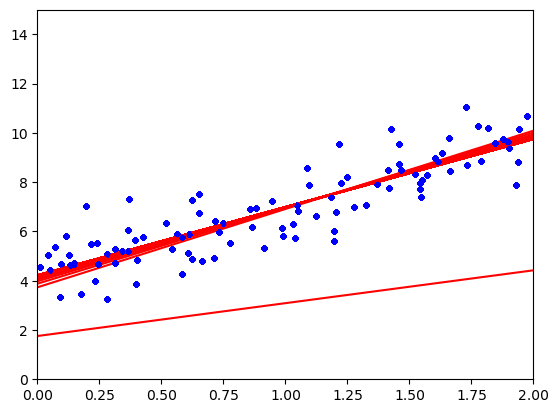

array([[4.21509616],
       [2.77011339]])

In [13]:
n_iterations = 1000
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    theta = linear_regression_gradient_descent(X, y, theta, .1)

    if iteration % 10 == 0:
        plot_predictions(theta)

plt.show()
theta

In the below 2 is not divided by X's shape, because on each pass a random index is selected and a sample under that index is taken for the calculations - only one sample, not the whole set and not a single batch.

In [14]:
t0, t1 = 5, 50


def learning_schedule(t):
    return t0 / (t + t1)


def linear_regression_stochastic_gradient_descent(X, y, theta, epoch):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    random_idx = np.random.randint(X.shape[0])
    xi = X_b[random_idx:random_idx + 1]
    yi = y[random_idx:random_idx + 1]
    gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * X.shape[0] + 1)

    return theta - eta * gradient

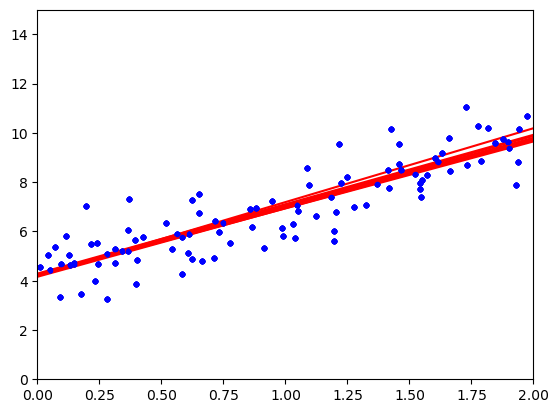

array([[4.18299125],
       [2.7270458 ]])

In [15]:
n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = linear_regression_stochastic_gradient_descent(X, y, theta, epoch)

    if epoch % 5 == 0:
        plot_predictions(theta)

plt.show()
theta

In [16]:
def linear_regression_minibatch_stochastic_gradient_descent(X, y, theta, epoch, batch_size):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    random_idx = np.random.randint(X.shape[0] - batch_size)
    xi = X_b[random_idx:random_idx + batch_size + 1]
    yi = y[random_idx:random_idx + batch_size + 1]
    gradient = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * X.shape[0] + 1)

    return theta - eta * gradient

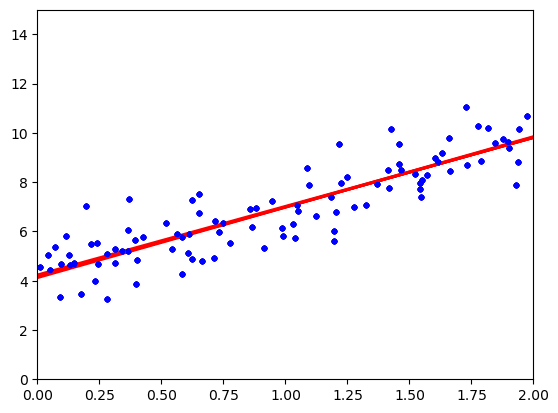

array([[4.18117442],
       [2.82040177]])

In [17]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = linear_regression_minibatch_stochastic_gradient_descent(X, y, theta, epoch, 5)

    if epoch % 5 == 0:
        plot_predictions(theta)

plt.show()
theta